# Mini VGG architecture on CIFAR10 dataset with Learning Rate Scheduler

In the last example, we've explored the Mini-VGG architecture, based on the VGG family from [Simonyan and Zisserman](https://arxiv.org/pdf/1409.1556.pdf). For this example, we consider the Learning Rate Scheduler, to propose a piecewise function to change the learning rate, every five epochs. In the previous example, we've considered the learn rate decay, where we just can to change the power of the function. The advantage of Learning Rate Scheduler is that, we can think about our function.

## Importing Libraries

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from compvis.ann.cnns import MiniVGG # compvis module
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

## Loading and prepocessing the dataset

In [2]:
((X_train, y_train), (X_test, y_test)) = cifar10.load_data() # defining the training and test set

**Normalization**

In [3]:
X_train = X_train.astype("float") / 255.
X_test = X_test.astype("float") / 255. # Normalization [0,1]

**Label Encoding**

In [4]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

**List of targets**

In [5]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog",
              "horse", "ship", "truck"]

## Building the model

We build the Mini VGG model with the compvis module, using the submodule cnns, we call MiniVGG class. Beyond the model, we also consider the SGD regularization.

**The Mini VGG** considered here is constituted by 4 convolutional layers, two with $32$ and $16$ filters.

**Step function for the learning rate decay**

The step function considered here is defined as:

$\alpha_{i + 1} = \alpha_{0}F^(1 + i/D ^)$

where $ \alpha_{0}$ is the initial Learning rate, $F$ is a factor to control the decay and $D$ is the step of decay.

In [6]:
def step_decay(epoch, lr):
    
    init_alpha = 0.01 # initial learning rate
    factor = 0.25
    dropEvery = 5 # step size
    
    if epoch == 1:
        lr = init_alpha
    elif   epoch%5 == 0:
        lr = init_alpha * (factor ** np.floor((1 + epoch) / dropEvery))
    else:
        lr = lr
    return lr

    

**Creating the callback and the model**

In [7]:
callbacks = [LearningRateScheduler(step_decay)]

In [8]:
opt = SGD(momentum=0.9, nesterov=True) # regularization
model = MiniVGG.build(32, 32, 3, 10) # w, h, depth, classes
model.compile(loss = "categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"]) # Compiling the model

**Training the model with $40$ epochs with a factor $F = 0.25$ in the step function**.

In [9]:
H = model.fit(X_train, y_train, validation_data = (X_test, y_test),
              batch_size = 64, epochs = 40, callbacks=callbacks, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 11s 227us/sample - loss: 1.6294 - accuracy: 0.4606 - val_loss: 1.3607 - val_accuracy: 0.5384
Epoch 2/40
50000/50000 [==============================] - 8s 169us/sample - loss: 1.1521 - accuracy: 0.6035 - val_loss: 0.8977 - val_accuracy: 0.6866
Epoch 3/40
50000/50000 [==============================] - 8s 169us/sample - loss: 0.9636 - accuracy: 0.6643 - val_loss: 0.8166 - val_accuracy: 0.7183
Epoch 4/40
50000/50000 [==============================] - 8s 170us/sample - loss: 0.8590 - accuracy: 0.7017 - val_loss: 0.7709 - val_accuracy: 0.7287
Epoch 5/40
50000/50000 [==============================] - 8s 169us/sample - loss: 0.7844 - accuracy: 0.7282 - val_loss: 0.8644 - val_accuracy: 0.7002
Epoch 6/40
50000/50000 [==============================] - 9s 170us/sample - loss: 0.6611 - accuracy: 0.7690 - val_loss: 0.6830 - val_accuracy: 0.7650
Epoch 7/40
50000/50000 [=========================

### Predicting on the trained model and evaluating it

**Predicting**

In [10]:
predictions = model.predict(X_test, batch_size = 64)

**Classification Report**

In [11]:
cr = classification_report(y_test.argmax(axis = 1), predictions.argmax(axis =1),
                           target_names = labelNames)

In [12]:
print(cr)

              precision    recall  f1-score   support

    airplane       0.84      0.80      0.82      1000
  automobile       0.92      0.89      0.90      1000
        bird       0.75      0.67      0.71      1000
         cat       0.64      0.59      0.61      1000
        deer       0.73      0.79      0.76      1000
         dog       0.71      0.72      0.71      1000
        frog       0.80      0.89      0.84      1000
       horse       0.84      0.84      0.84      1000
        ship       0.90      0.90      0.90      1000
       truck       0.85      0.90      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



**Visualizing the metrics results**

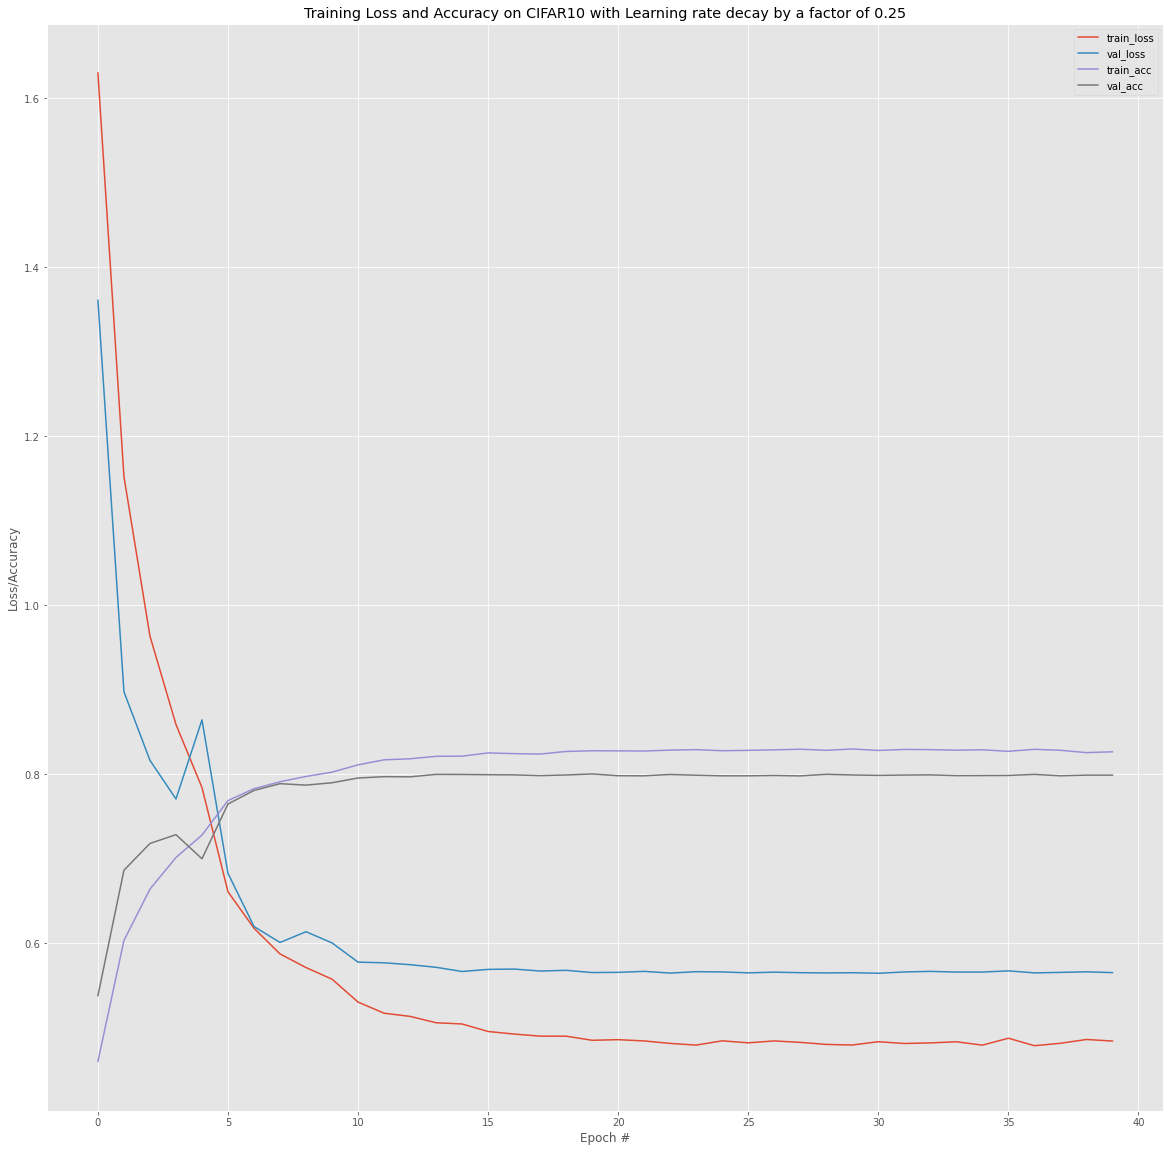

In [13]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20))
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR10 with Learning rate decay by a factor of 0.25")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.axis('on')
plt.legend()
plt.show()

**Creating the step function decay for a factor $F=0.5$.**

In [6]:
def step_decay(epoch, lr):
    
    init_alpha = 0.01 # initial learning rate
    factor = 0.5
    dropEvery = 5 # step size
    
    if epoch == 1:
        lr = init_alpha
    elif   epoch%5 == 0:
        lr = init_alpha * (factor ** np.floor((1 + epoch) / dropEvery))
    else:
        lr = lr
    return lr

**Creating the callbacks and the model**

In [7]:
callbacks = [LearningRateScheduler(step_decay)]

In [8]:
opt = SGD(momentum=0.9, nesterov=True) # regularization
model = MiniVGG.build(32, 32, 3, 10) # w, h, depth, classes
model.compile(loss = "categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"]) # Compiling the model

**Training the model with $40$ epochs with a factor $F = 0.5$ in the step function.**

In [9]:
H = model.fit(X_train, y_train, validation_data = (X_test, y_test),
              batch_size = 64, epochs = 40, callbacks=callbacks, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 11s 223us/sample - loss: 1.6838 - accuracy: 0.4389 - val_loss: 1.4631 - val_accuracy: 0.5278
Epoch 2/40
50000/50000 [==============================] - 9s 174us/sample - loss: 1.2131 - accuracy: 0.5812 - val_loss: 0.9355 - val_accuracy: 0.6695
Epoch 3/40
50000/50000 [==============================] - 9s 171us/sample - loss: 1.0015 - accuracy: 0.6523 - val_loss: 1.0728 - val_accuracy: 0.6433
Epoch 4/40
50000/50000 [==============================] - 8s 167us/sample - loss: 0.8893 - accuracy: 0.6905 - val_loss: 0.8513 - val_accuracy: 0.7072
Epoch 5/40
50000/50000 [==============================] - 9s 177us/sample - loss: 0.8044 - accuracy: 0.7186 - val_loss: 0.7680 - val_accuracy: 0.7341
Epoch 6/40
50000/50000 [==============================] - 9s 172us/sample - loss: 0.6977 - accuracy: 0.7549 - val_loss: 0.6775 - val_accuracy: 0.7613
Epoch 7/40
50000/50000 [=========================

### Predicting on the trained model and evaluating it

**Predicting**

In [10]:
predictions = model.predict(X_test, batch_size = 64)

**Classification Report**

In [11]:
cr = classification_report(y_test.argmax(axis = 1), predictions.argmax(axis =1),
                           target_names = labelNames)

In [12]:
print(cr)

              precision    recall  f1-score   support

    airplane       0.86      0.82      0.84      1000
  automobile       0.92      0.91      0.91      1000
        bird       0.80      0.71      0.75      1000
         cat       0.67      0.67      0.67      1000
        deer       0.77      0.83      0.80      1000
         dog       0.73      0.75      0.74      1000
        frog       0.84      0.88      0.86      1000
       horse       0.88      0.87      0.88      1000
        ship       0.91      0.91      0.91      1000
       truck       0.88      0.90      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



**Visualizing the metrics results**

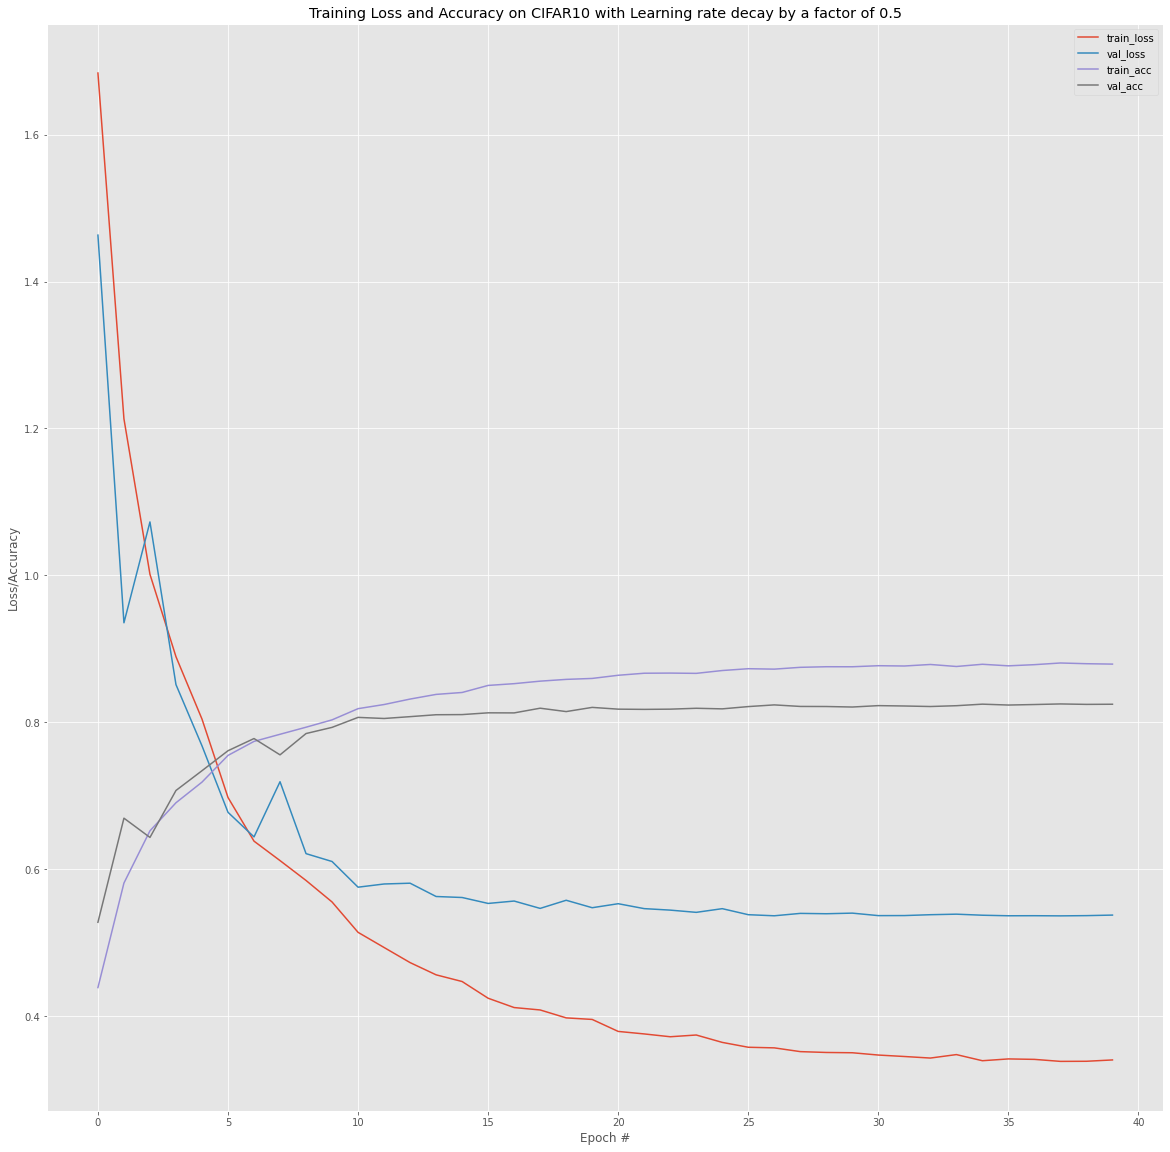

In [13]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20))
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR10 with Learning rate decay by a factor of 0.5")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.axis('on')
plt.legend()
plt.show()

## Conclusion

As we can see, the results in this example are not so far from the last [example](https://github.com/IgorMeloS/Computer-Vision-Training/blob/main/ComputerVision%20Module/Pratical%20Examples/5%20-%20MiniVGG%20on%20CIFAR10/minivgg_cifar10.ipynb). For the first model, we've considered a factor of $0.25$ for the piecewise function. The accuracy on the test set was $79\%$ and $82\%$ for the training test. This indicates that our model is out of over-fit. If we look for the loss function, there's a little difference between the curves, indicating that our model can be in over-fitting. There is also another factor, for the both metrics, accuracy and loss, the curves have stagnated after $15$ epochs.

The results for the model with a factor of $0.5$ was better, if we consider the absolute value of the accuracy on the test set. But the gap between the curves demonstrates that our model can be in over-fitting situation, as in the previous example.

So, the Learning Rate Scheduler can improve our results, as we have seen for the model with the factor of $0.25$. We must keep in mind that our data is not enough large and, there exist other techniques to improve these results and avoid the over-fit. In general, Learning Rate Scheduler is a good step to think about.